## Handwritten Digits Recognition (OCR)

!pip install --upgrade tensorflow

!pip install --upgrade scikit-learn

In [3]:
#Import required Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
from tensorflow import keras

#from tensorflow.keras.datasets import MNIST
import tensorflow as tf

#For preprocessing, the ImageDataGenerator is used. It is used for the generation of batches of augmented image datain real-time during the training process
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,  BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.optimizers import Adam, SGD, RMSprop, Adadelta
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras.regularizers import L1L2
from keras.regularizers import l1
from keras.regularizers import l2

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

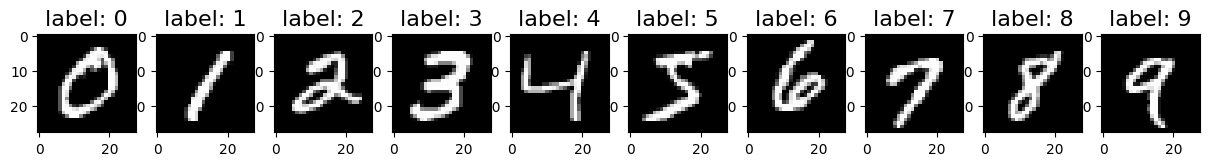

In [5]:
num_classes = 10
fig, axs = plt.subplots(1, num_classes, figsize=(15, 15))
for i in range(0, num_classes):
    sample = X_train[y_train == i][0]
    axs[i].imshow(sample, cmap = 'gray')
    axs[i].set_title('label: {}'.format(i), fontsize = 16)

In [6]:
# Preprocess the data

X_train=X_train.reshape((60000,28,28,1))/255
X_test=X_test.reshape((10000,28,28,1))/255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [7]:
y_train.shape

(60000, 10)

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
# Define data augmentation parameters for training set
train_datagen = ImageDataGenerator(
    rotation_range=20, # Randomly rotate images up to 10 degrees
    width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
    height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
    horizontal_flip=True, # Randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    shear_range=0.10, # crops part of the image
    zoom_range=0.10 #zooms the image by 10%
)

In [11]:
# Split the training set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(X_train, y_train, random_state=42)

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Adam Optimizer Train Loss: 0.0880, validation Loss: 0.0499, 'Number of Epochs: 10'


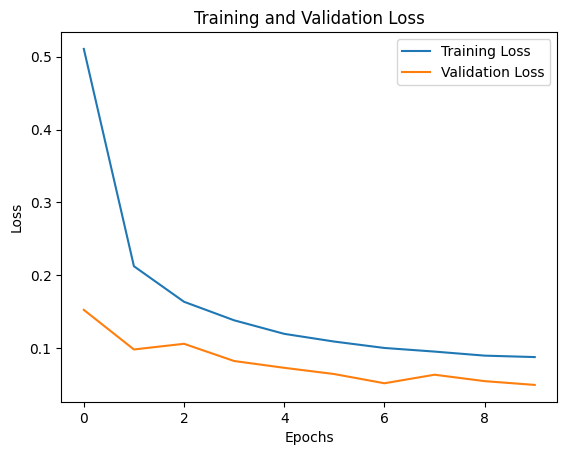

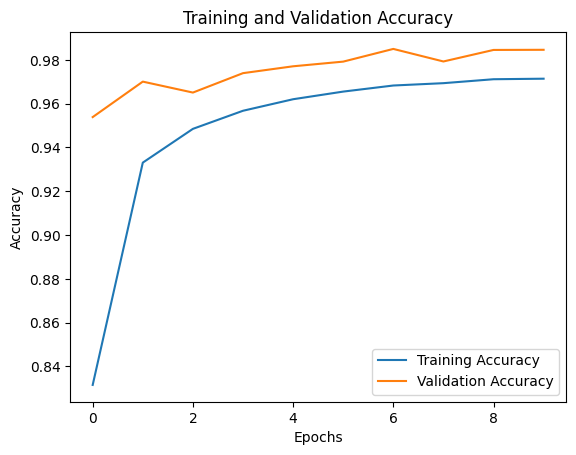

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.96      0.98      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 968    0    0    1    1    1    3    1    2    3]
 [   0 1129    3    0    2    0    0    1    0    0]
 [   1    2  983    1    0   24   18    3    0    0]
 [   0    0    1  997    0 

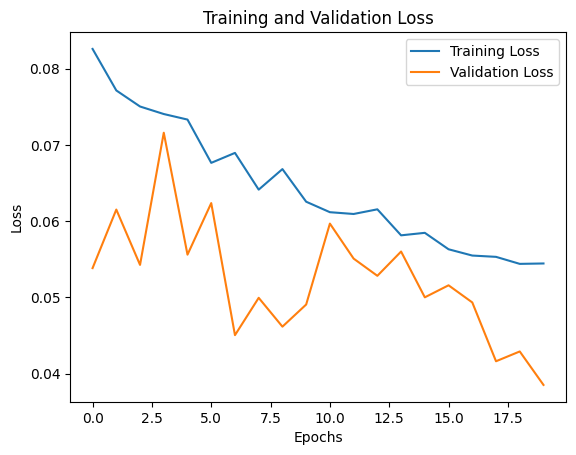

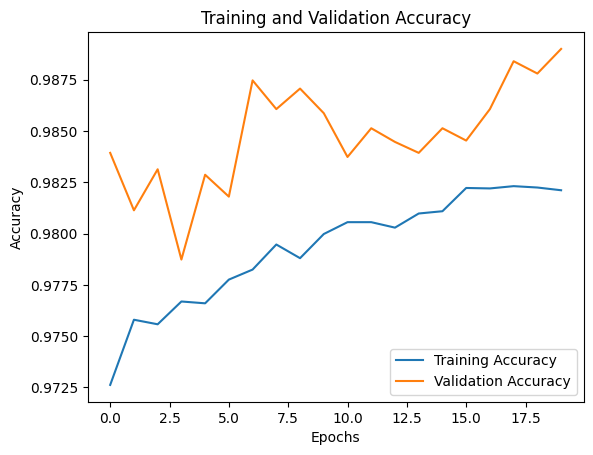

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.96      0.99      0.97       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 974    0    1    0    0    2    1    1    0    1]
 [   0 1125    0    1    2    0    1    6    0    0]
 [   2    1 1005    2    0   13    3    6    0    0]
 [   0    0    1  998    0 

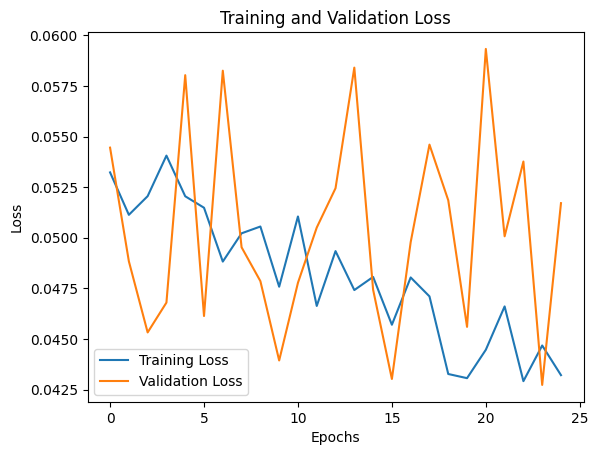

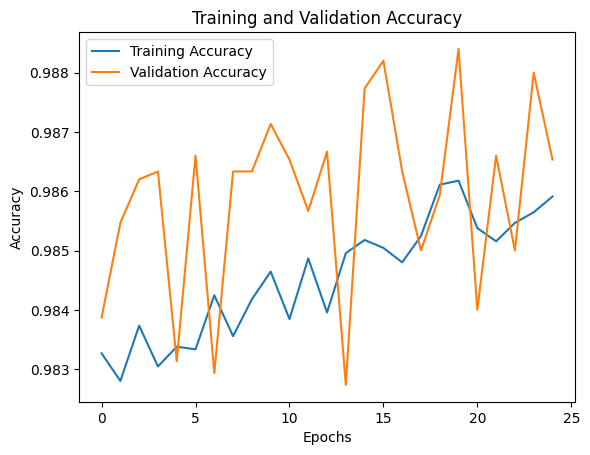

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.97      0.97      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    1    0    0    1    0    0    2    0]
 [   0 1128    1    1    0    0    1    3    0    1]
 [   1    0 1006    2    0   10    8    5    0    0]
 [   0    0    1 1006    0

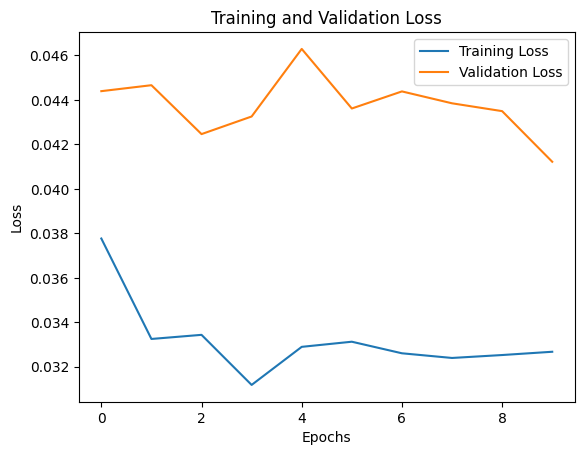

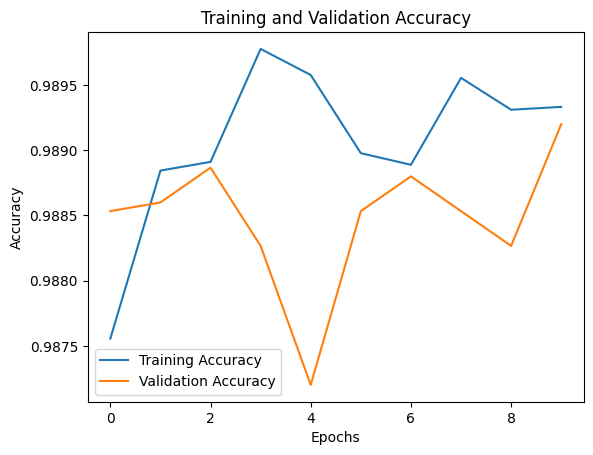

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    0    0    2    0]
 [   1 1129    1    0    0    0    1    2    0    1]
 [   1    0 1010    1    0   10    7    3    0    0]
 [   0    0    1 1005    0 

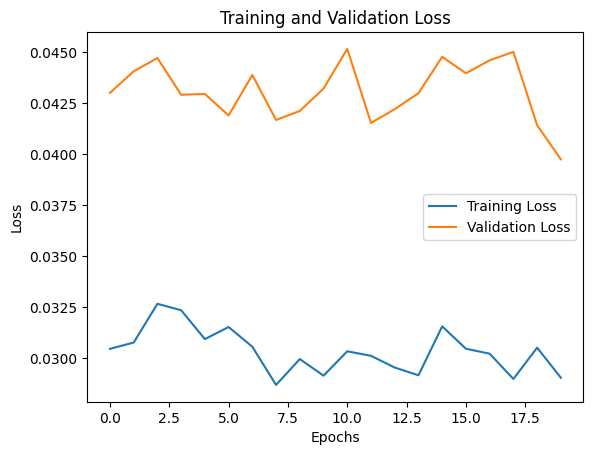

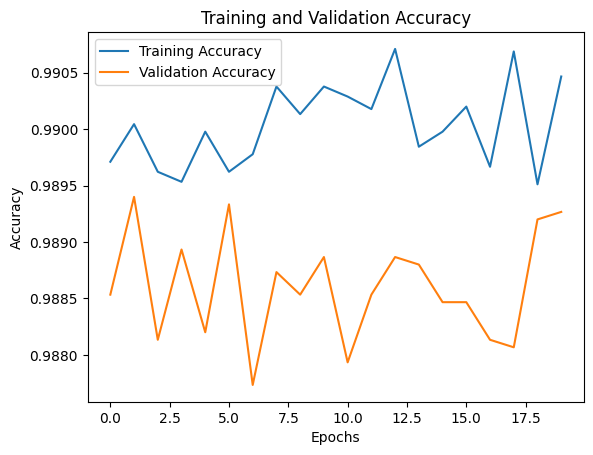

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    0    0    2    0]
 [   1 1129    2    0    0    0    0    2    0    1]
 [   2    0 1007    2    0    9    8    4    0    0]
 [   0    0    1 1002    0 

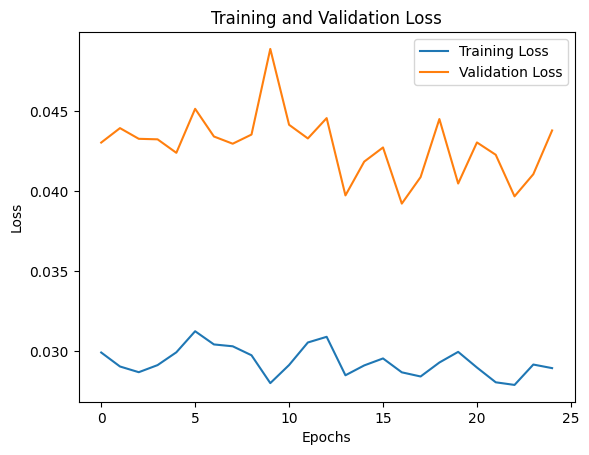

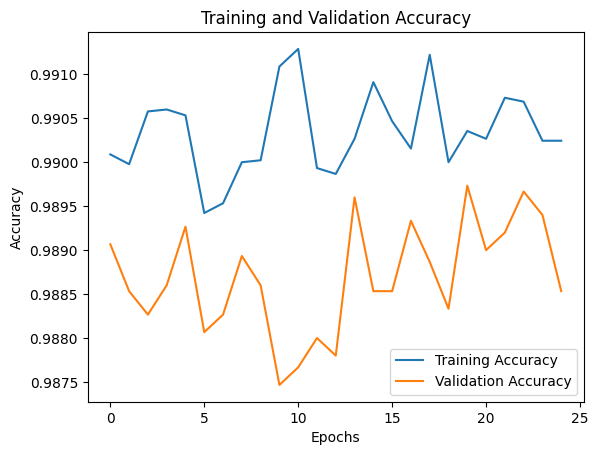

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    0    0    0    1    0    0    2    1]
 [   1 1127    3    1    0    0    2    1    0    0]
 [   1    0 1007    2    0   11    8    3    0    0]
 [   0    0    1 1004    0 

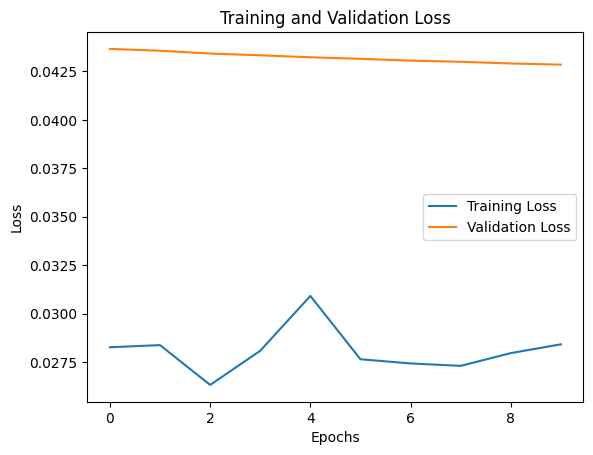

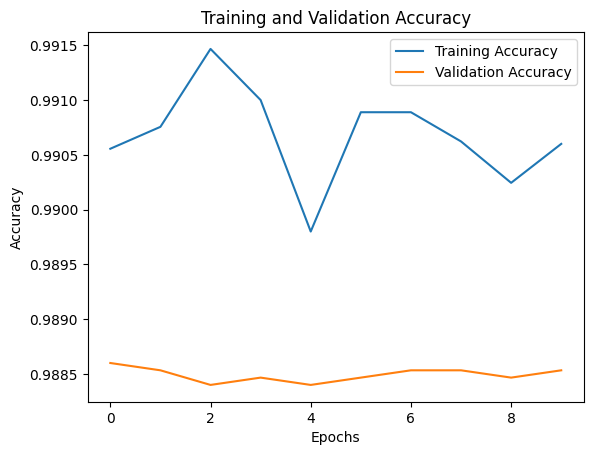

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    0    0    0    1    0    0    2    1]
 [   1 1128    3    0    0    0    1    2    0    0]
 [   1    0 1008    1    0   11    8    3    0    0]
 [   0    0    1 1004    0 

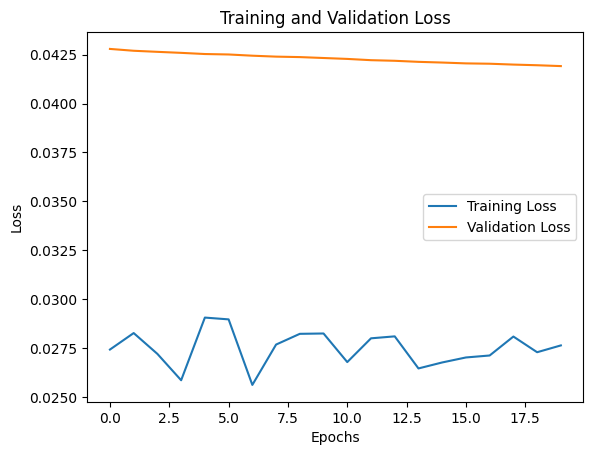

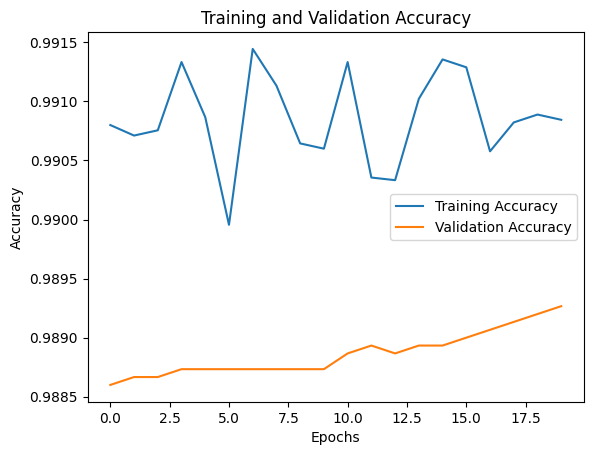

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    0    0    0    1    0    0    2    1]
 [   1 1128    3    0    0    0    1    2    0    0]
 [   1    0 1008    1    0   10    8    4    0    0]
 [   0    0    1 1004    0 

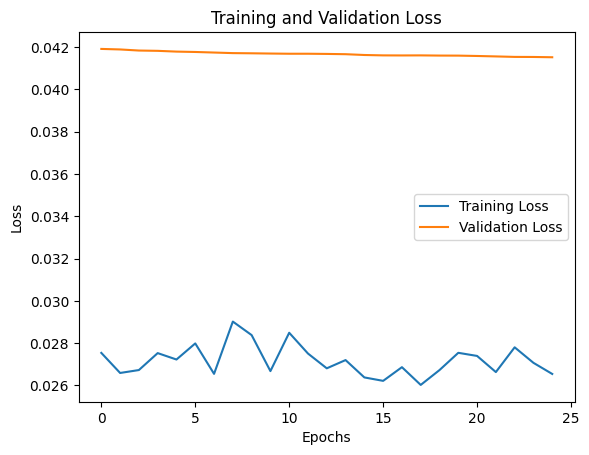

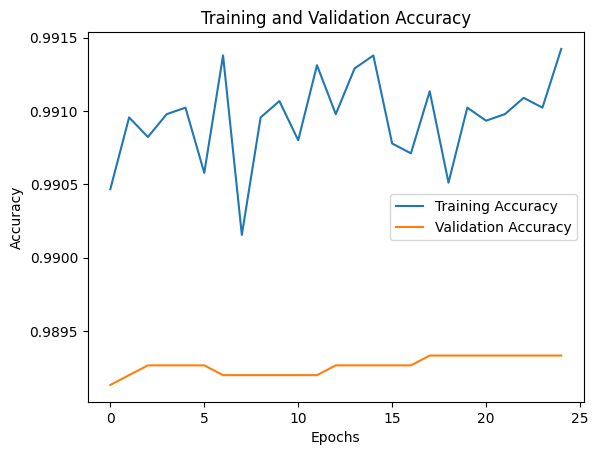

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    0    0    0    1    0    0    2    1]
 [   1 1128    3    0    0    0    1    2    0    0]
 [   2    0 1007    1    0   10    8    4    0    0]
 [   0    0    1 1002    0 

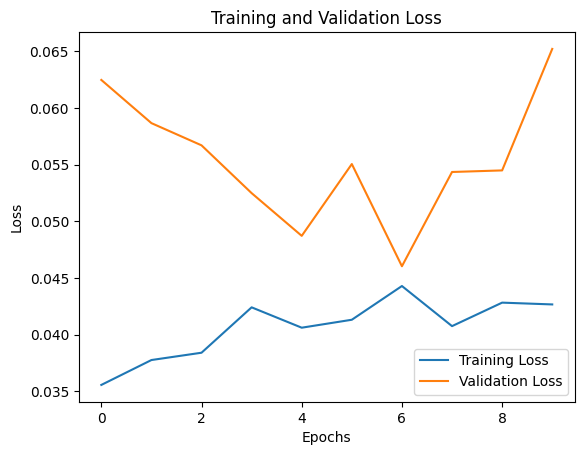

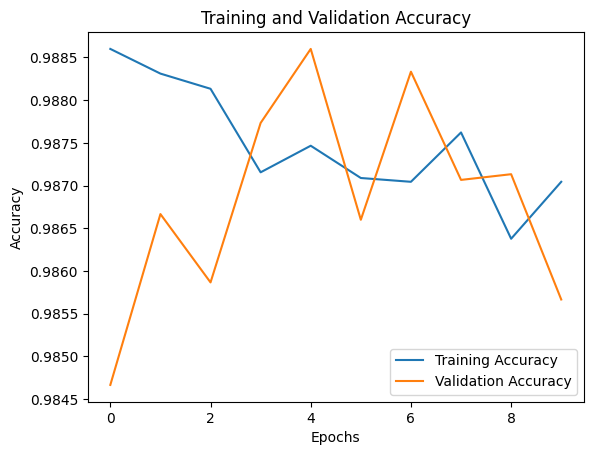

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    0    0    2    0]
 [   0 1128    2    0    0    0    0    5    0    0]
 [   0    0 1011    1    0    7    9    2    2    0]
 [   0    0    1 1002    1 

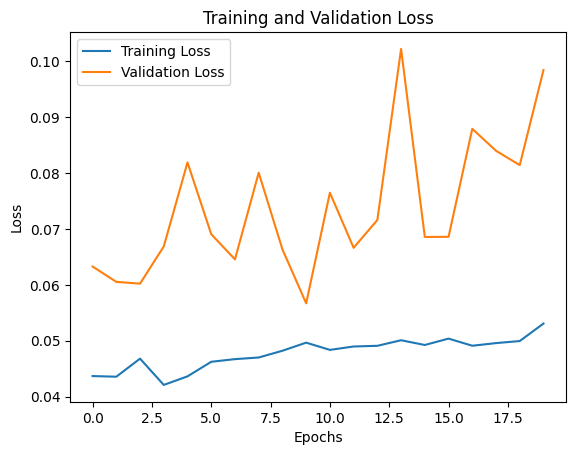

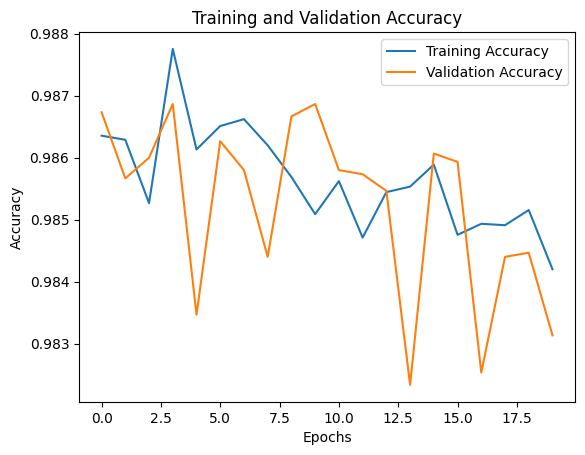

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.98      0.96      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    1    0    0    0    0    0    0    1]
 [   0 1129    3    0    0    0    1    2    0    0]
 [   0    0 1016    0    0    5    7    4    0    0]
 [   0    2    5  994    1 

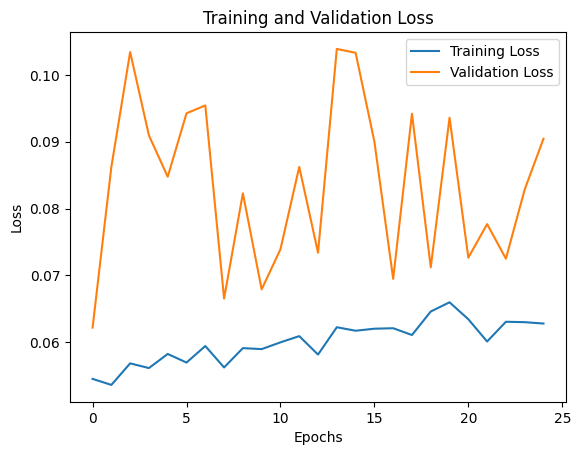

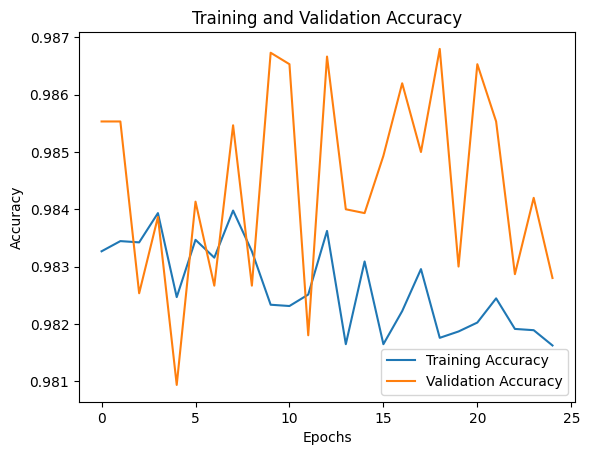

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.94      0.99      0.96      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.97      0.97       892
           6       0.99      0.95      0.97       958
           7       0.98      1.00      0.99      1028
           8       0.98      1.00      0.99       974
           9       1.00      0.97      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 971    0    3    1    2    0    0    0    3    0]
 [   0 1127    1    0    0    0    0    6    1    0]
 [   1    0 1020    1    0    5    3    2    0    0]
 [   0    0    3  998    0 

In [13]:
# Define a list of optimizers to try
optimizers = [Adam(), SGD(), Adadelta(), RMSprop()]

#List of Epochs to try
epochs_list = [10, 20, 25]
# Compile and fit the model for each optimizer
for optimizer in optimizers:
    for epochs in epochs_list:
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
                            steps_per_epoch=len(train_images) / 32,
                            validation_data=(val_images, val_labels),
                            epochs=epochs, verbose=0)
        print(f"{optimizer.get_config()['name']} Optimizer Train Loss: {history.history['loss'][-1]:.4f}, validation Loss: {history.history['val_loss'][-1]:.4f}, 'Number of Epochs: {epochs}'")
        # Check for overfitting
        pyplot.plot(history.history['loss'], label='Training Loss')
        pyplot.plot(history.history['val_loss'], label='Validation Loss')
        pyplot.title('Training and Validation Loss')
        pyplot.xlabel('Epochs')
        pyplot.ylabel('Loss')
        pyplot.legend()
        pyplot.show()

        # Plot training and validation accuracy
        #Plots the training accuracy as a line with label "Training Accuracy".
        pyplot.plot(history.history['accuracy'], label='Training Accuracy')
        #Plots the validation accuracy as a line with label "Validation Accuracy".
        pyplot.plot(history.history['val_accuracy'], label='Validation Accuracy')
        #Sets the title of the plot to "Training and Validation Accuracy".
        pyplot.title('Training and Validation Accuracy')
        #Sets the label of the x-axis to "Epochs".
        pyplot.xlabel('Epochs')
        #Sets the label of the y-axis to "Accuracy".
        pyplot.ylabel('Accuracy')
        #Shows the legend of the plot with the labels of the two lines.
        pyplot.legend()
        #Shows the plot on the screen.
        pyplot.show()

        # Evaluate the model
        test_loss, test_acc = model.evaluate(X_test, y_test)

        #Predict with the model
        y_pred = model.predict(X_test)

        # Convert predictions from one-hot encoding to label encoding
        y_pred_labels = np.argmax(y_pred, axis=1)
        y_true_labels = np.argmax(y_test, axis=1)

        # Print the classification report
        print(classification_report(y_true_labels, y_pred_labels))

        # Print the confusion matrix
        print(confusion_matrix(y_true_labels, y_pred_labels))

### How did the use of different regularisation methods affect the performance of the CNN model?

#### Using SGD Optimizer with Drop-Out Regularizer of 0.3, learning_rate of 0.1and momentum of 0.9, epoch 15

In [14]:
# Create model
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

Epoch 1/15
1406/1406 [==============================] - 52s 36ms/step - loss: 1.1535 - accuracy: 0.6242 - val_loss: 0.6177 - val_accuracy: 0.8026
Epoch 2/15
1406/1406 [==============================] - 42s 30ms/step - loss: 1.2500 - accuracy: 0.5930 - val_loss: 0.6991 - val_accuracy: 0.7897
Epoch 3/15
1406/1406 [==============================] - 38s 27ms/step - loss: 1.2877 - accuracy: 0.5796 - val_loss: 0.8021 - val_accuracy: 0.7446
Epoch 4/15
1406/1406 [==============================] - 39s 28ms/step - loss: 1.3475 - accuracy: 0.5639 - val_loss: 0.9112 - val_accuracy: 0.7377
Epoch 5/15
1406/1406 [==============================] - 39s 28ms/step - loss: 1.3859 - accuracy: 0.5443 - val_loss: 0.8695 - val_accuracy: 0.7183
Epoch 6/15
1406/1406 [==============================] - 42s 30ms/step - loss: 1.5397 - accuracy: 0.4914 - val_loss: 1.5091 - val_accuracy: 0.5796
Epoch 7/15
1406/1406 [==============================] - 42s 30ms/step - loss: 1.6125 - accuracy: 0.4672 - val_loss: 1.8186 -

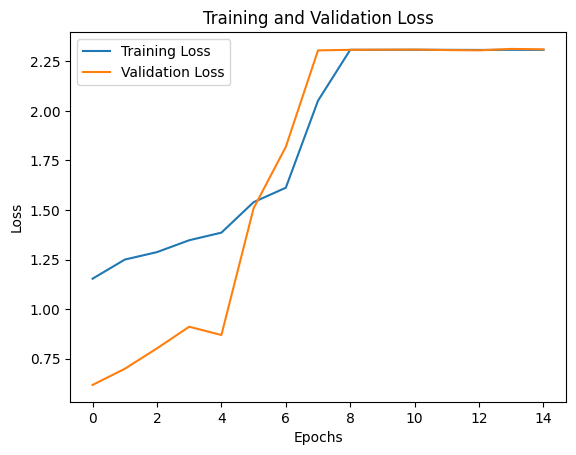

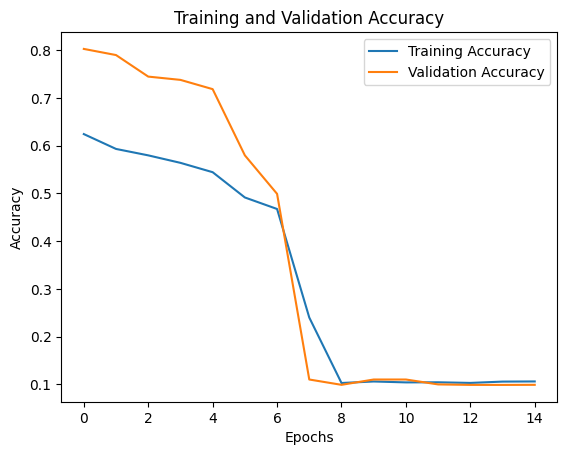

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.10      1.00      0.17       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[   0    0    0    0    0    0  980    0    0    0]
 [   0    0    0    0    0    0 1135    0    0    0]
 [   0    0    0    0    0    0 1032    0    0    0]
 [   0    0    0    0    0 

/Users/waleibitoye/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/waleibitoye/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/waleibitoye/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [15]:
model.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
                        steps_per_epoch=len(train_images) / 32,
                        validation_data=(val_images, val_labels),
                        epochs=15)
    
# Check for overfitting
pyplot.plot(history.history['loss'], label='Training Loss')
pyplot.plot(history.history['val_loss'], label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()
    
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
pyplot.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
pyplot.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
pyplot.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
pyplot.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
pyplot.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
pyplot.legend()

#Shows the plot on the screen.
pyplot.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
    
#Predict with the model
y_pred = model.predict(X_test)
    
# Convert predictions from one-hot encoding to label encoding
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
    
# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))
    
# Print the confusion matrix
print(confusion_matrix(y_true_labels, y_pred_labels))

Using SGD Optimizer with Drop-Out Regularizer of 0.3, learning_rate of 0.1 and momentum of 0.9, epoch 15, the accuracy gotten was 10%.

#### Using SGD Optimizer with Drop-Out Regularizer of 0.3, Batch Normalization, learning_rate of 0.001 and momentum of 0.9, epoch 10

In [16]:
# Create model
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

Epoch 1/10
1406/1406 [==============================] - 48s 33ms/step - loss: 0.8975 - accuracy: 0.7069 - val_loss: 0.6688 - val_accuracy: 0.7758
Epoch 2/10
1406/1406 [==============================] - 45s 32ms/step - loss: 0.6154 - accuracy: 0.8008 - val_loss: 0.5718 - val_accuracy: 0.8220
Epoch 3/10
1406/1406 [==============================] - 36s 26ms/step - loss: 0.5586 - accuracy: 0.8186 - val_loss: 0.7840 - val_accuracy: 0.7465
Epoch 4/10
1406/1406 [==============================] - 38s 27ms/step - loss: 0.5296 - accuracy: 0.8299 - val_loss: 0.5568 - val_accuracy: 0.8197
Epoch 5/10
1406/1406 [==============================] - 36s 25ms/step - loss: 0.5017 - accuracy: 0.8374 - val_loss: 0.4671 - val_accuracy: 0.8541
Epoch 6/10
1406/1406 [==============================] - 37s 27ms/step - loss: 0.4949 - accuracy: 0.8404 - val_loss: 0.4749 - val_accuracy: 0.8547
Epoch 7/10
1406/1406 [==============================] - 38s 27ms/step - loss: 0.4756 - accuracy: 0.8447 - val_loss: 0.3585 -

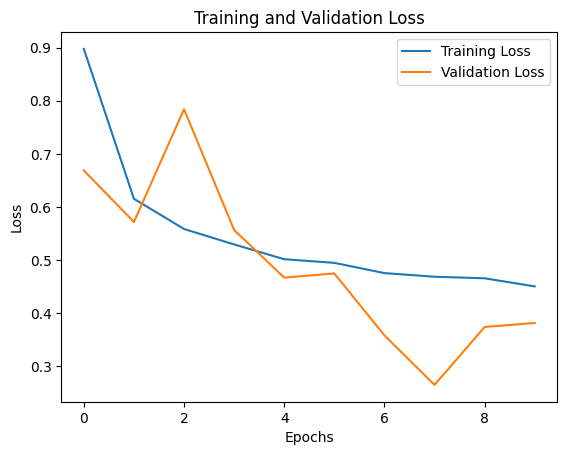

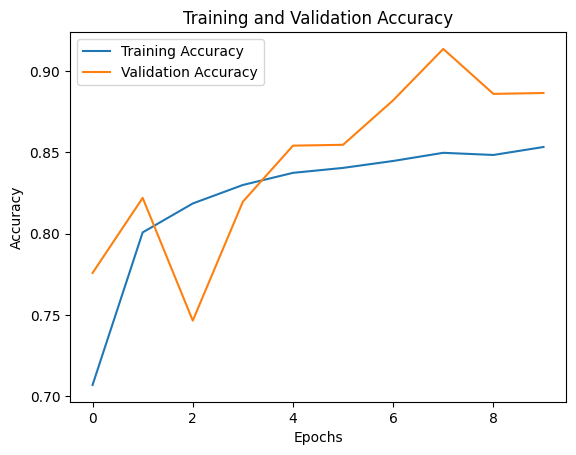

313/313 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       980
           1       1.00      0.90      0.95      1135
           2       0.82      0.91      0.86      1032
           3       0.66      0.91      0.77      1010
           4       0.89      0.99      0.94       982
           5       0.78      0.68      0.73       892
           6       0.98      0.86      0.92       958
           7       0.94      0.93      0.93      1028
           8       0.99      0.86      0.92       974
           9       0.97      0.91      0.94      1009

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.91      0.89      0.89     10000

[[ 933    0   11    6    4   11    9    1    2    3]
 [   0 1019   14   30   42    6    0   22    0    2]
 [   0    0  941   58    6   20    4    2    1    0]
 [   0    0   16  920    1 

In [17]:
#Compile and fit the model for each optimizer
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
                        steps_per_epoch=len(train_images) / 32,
                        validation_data=(val_images, val_labels),
                        epochs=10)
    
# Check for overfitting
pyplot.plot(history.history['loss'], label='Training Loss')
pyplot.plot(history.history['val_loss'], label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()
    
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
pyplot.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
pyplot.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
pyplot.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
pyplot.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
pyplot.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
pyplot.legend()

#Shows the plot on the screen.
pyplot.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
    
#Predict with the model
y_pred = model.predict(X_test)
    
# Convert predictions from one-hot encoding to label encoding
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
    
# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))
    
# Print the confusion matrix
print(confusion_matrix(y_true_labels, y_pred_labels))

Using SGD Optimizer with Drop-Out Regularizer of 0.3, Batch Normalization, learning_rate of 0.001, momentum of 0.9 and epoch of 10, the accuracy gotten was 89% which is a 79% increase from the previous parameters used.

#### Using Adam Optimizer with Drop-Out Regularizer of 0.5, learning_rate of 0.01 and beta_1 of 0.9, epoch 10

In [18]:
# Create model
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Epoch 1/10
1406/1406 [==============================] - 40s 28ms/step - loss: 1.5404 - accuracy: 0.5187 - val_loss: 2.5731 - val_accuracy: 0.4257
Epoch 2/10
1406/1406 [==============================] - 40s 28ms/step - loss: 1.4138 - accuracy: 0.5520 - val_loss: 0.9181 - val_accuracy: 0.7173
Epoch 3/10
1406/1406 [==============================] - 39s 28ms/step - loss: 1.4325 - accuracy: 0.5517 - val_loss: 0.8124 - val_accuracy: 0.7105
Epoch 4/10
1406/1406 [==============================] - 41s 29ms/step - loss: 1.3943 - accuracy: 0.5671 - val_loss: 0.5768 - val_accuracy: 0.7968
Epoch 5/10
1406/1406 [==============================] - 40s 28ms/step - loss: 1.3907 - accuracy: 0.5697 - val_loss: 0.6260 - val_accuracy: 0.7977
Epoch 6/10
1406/1406 [==============================] - 42s 30ms/step - loss: 1.3572 - accuracy: 0.5762 - val_loss: 0.9612 - val_accuracy: 0.6709
Epoch 7/10
1406/1406 [==============================] - 39s 28ms/step - loss: 1.4000 - accuracy: 0.5718 - val_loss: 0.5622 -

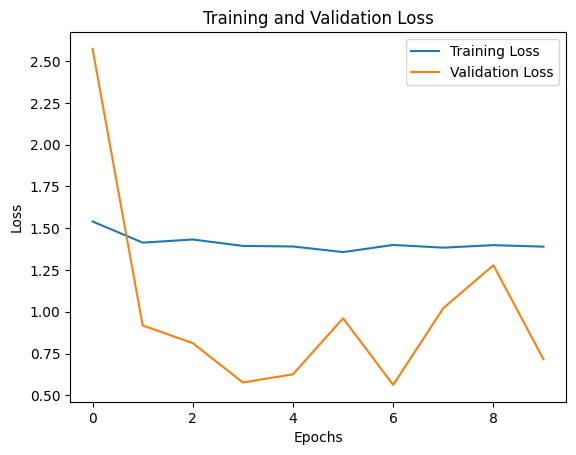

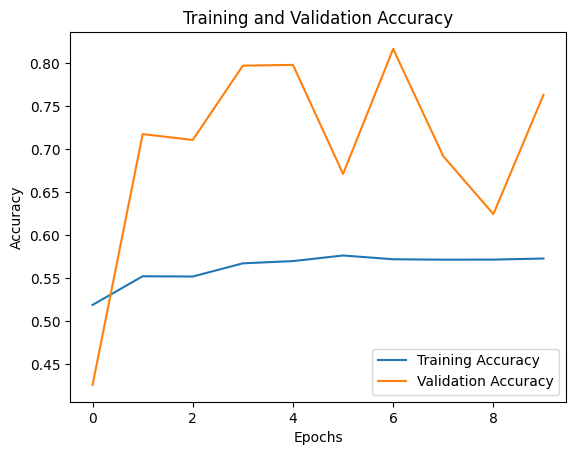

313/313 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       980
           1       1.00      0.68      0.81      1135
           2       0.64      0.92      0.75      1032
           3       0.73      0.42      0.53      1010
           4       0.88      0.95      0.91       982
           5       0.63      0.66      0.64       892
           6       0.95      0.74      0.83       958
           7       0.95      0.67      0.79      1028
           8       0.59      0.94      0.73       974
           9       0.76      0.91      0.83      1009

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.77     10000
weighted avg       0.81      0.78      0.77     10000

[[857   0  69   0   4   5  14   1  27   3]
 [  0 770  23   0  93   0   6   0 242   1]
 [  3   0 951   2   3  12   6   4  51   0]
 [  3   0 155 422   0 273   1   3 139  14]
 [  1   0   8 

In [19]:
#Compile and fit the model for each optimizer
model.compile(optimizer=Adam(learning_rate=0.01, beta_1=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
                        steps_per_epoch=len(train_images) / 32,
                        validation_data=(val_images, val_labels),
                        epochs=10)
    
# Check for overfitting
pyplot.plot(history.history['loss'], label='Training Loss')
pyplot.plot(history.history['val_loss'], label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()
    
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
pyplot.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
pyplot.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
pyplot.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
pyplot.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
pyplot.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
pyplot.legend()

#Shows the plot on the screen.
pyplot.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
    
#Predict with the model
y_pred = model.predict(X_test)
    
# Convert predictions from one-hot encoding to label encoding
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
    
# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))
    
# Print the confusion matrix
print(confusion_matrix(y_true_labels, y_pred_labels))

Using Adam Optimizer with Drop-Out Regularizer of 0.5, learning_rate of 0.01 and beta_1 of 0.9, epoch 10, Batch Normalization the accuracy gotten was 78%.

#### Increasing the drop-out for Adam Optimizer to 0.7, learning_rate to 0.03, beta_1 of 0.9, epoch to 15, Batch Normalization, with 2 convolution blocks

In [20]:
# Create model
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(10, activation='softmax'))

Epoch 1/15
1406/1406 [==============================] - 65s 45ms/step - loss: 1.5694 - accuracy: 0.5563 - val_loss: 0.7975 - val_accuracy: 0.7895
Epoch 2/15
1406/1406 [==============================] - 65s 46ms/step - loss: 1.4145 - accuracy: 0.6410 - val_loss: 0.7612 - val_accuracy: 0.8262
Epoch 3/15
1406/1406 [==============================] - 59s 42ms/step - loss: 1.4479 - accuracy: 0.6706 - val_loss: 0.3279 - val_accuracy: 0.9102
Epoch 4/15
1406/1406 [==============================] - 57s 40ms/step - loss: 1.4590 - accuracy: 0.6913 - val_loss: 0.4507 - val_accuracy: 0.9073
Epoch 5/15
1406/1406 [==============================] - 58s 41ms/step - loss: 1.6493 - accuracy: 0.6932 - val_loss: 0.5008 - val_accuracy: 0.8889
Epoch 6/15
1406/1406 [==============================] - 60s 43ms/step - loss: 1.5014 - accuracy: 0.7162 - val_loss: 0.3560 - val_accuracy: 0.9203
Epoch 7/15
1406/1406 [==============================] - 64s 45ms/step - loss: 1.6848 - accuracy: 0.7164 - val_loss: 0.3270 -

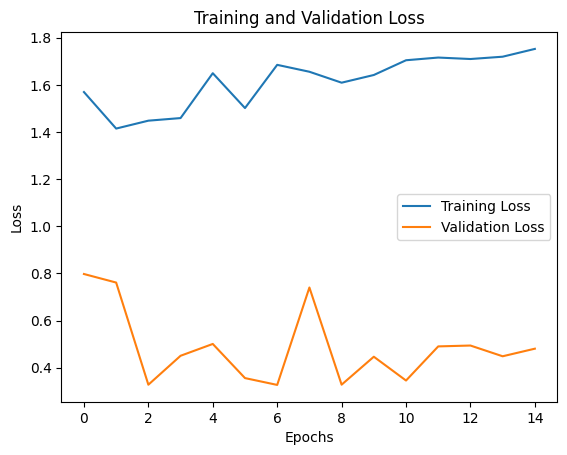

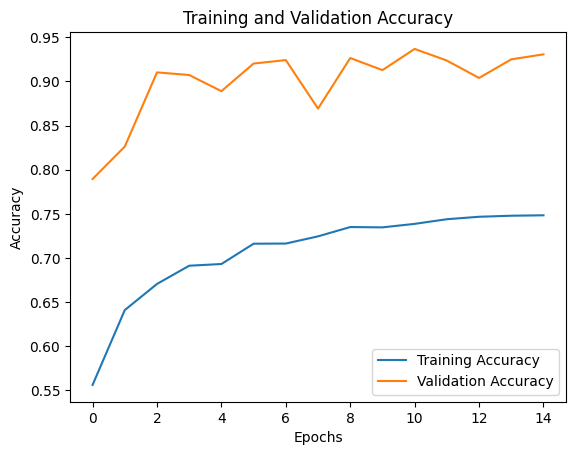

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.89      0.88      0.89      1010
           4       0.98      0.95      0.96       982
           5       0.94      0.79      0.86       892
           6       0.95      0.96      0.95       958
           7       0.98      0.91      0.94      1028
           8       0.89      0.98      0.93       974
           9       0.85      0.97      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000

[[ 962    0    0    0    0    0    8    0    7    3]
 [   0 1109    7    0    2    0    7    1    3    6]
 [   6    1  966    5    3    4   11    2   24   10]
 [   5    1   26  892    0 

In [21]:
#Compile and fit the model for each optimizer
model.compile(optimizer=Adam(learning_rate=0.03, beta_1=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
                        steps_per_epoch=len(train_images) / 32,
                        validation_data=(val_images, val_labels),
                        epochs=15)
    
# Check for overfitting
pyplot.plot(history.history['loss'], label='Training Loss')
pyplot.plot(history.history['val_loss'], label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()
    
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
pyplot.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
pyplot.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
pyplot.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
pyplot.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
pyplot.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
pyplot.legend()

#Shows the plot on the screen.
pyplot.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
    
#Predict with the model
y_pred = model.predict(X_test)
    
# Convert predictions from one-hot encoding to label encoding
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
    
# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))
    
# Print the confusion matrix
print(confusion_matrix(y_true_labels, y_pred_labels))

Using Drop-out for Adam Optimizer as 0.7, learning_rate as 0.03, beta_1 of 0.9, epoch to 15, Batch Normalization, with 2 convolution blocks, my model improved as the accuracy gotten was 93% which is higher than the 78% previously gotten with Drop-Out Regularizer of 0.5, learning_rate of 0.01 and beta_1 of 0.9, epoch 10, Batch Normalization

### how does changes to the number of convolution blocks affect the performance of the model quantitatively?

#### Increasing the drop-out for Adam Optimizer to 0.8, learning_rate to 0.05, beta_1 of 0.9, epoch to 15, Batch Normalization, L2 regularizer of 0.01, with 4 convolution blocks

In [22]:
# Create model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(10, activation='softmax'))

Epoch 1/15
1406/1406 [==============================] - 113s 79ms/step - loss: 1.8470 - accuracy: 0.4818 - val_loss: 1.8128 - val_accuracy: 0.7057
Epoch 2/15
1406/1406 [==============================] - 115s 82ms/step - loss: 1.5344 - accuracy: 0.6449 - val_loss: 0.7353 - val_accuracy: 0.8081
Epoch 3/15
1406/1406 [==============================] - 102s 73ms/step - loss: 1.3571 - accuracy: 0.7095 - val_loss: 0.8567 - val_accuracy: 0.8570
Epoch 4/15
1406/1406 [==============================] - 103s 73ms/step - loss: 1.4638 - accuracy: 0.7359 - val_loss: 0.4254 - val_accuracy: 0.9310
Epoch 5/15
1406/1406 [==============================] - 103s 73ms/step - loss: 1.3181 - accuracy: 0.7677 - val_loss: 0.6760 - val_accuracy: 0.9247
Epoch 6/15
1406/1406 [==============================] - 107s 76ms/step - loss: 1.4348 - accuracy: 0.7822 - val_loss: 0.8143 - val_accuracy: 0.8997
Epoch 7/15
1406/1406 [==============================] - 122s 87ms/step - loss: 1.3085 - accuracy: 0.8037 - val_loss: 0

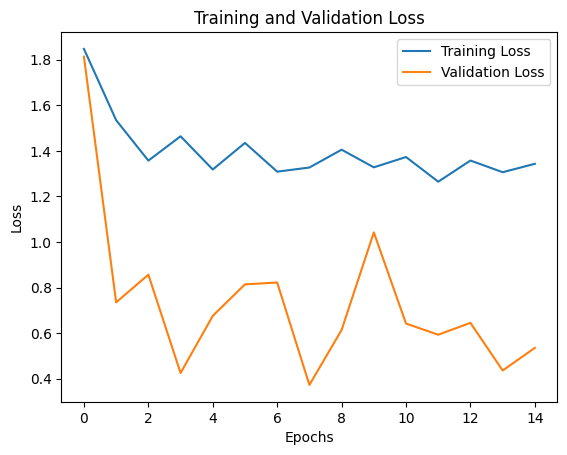

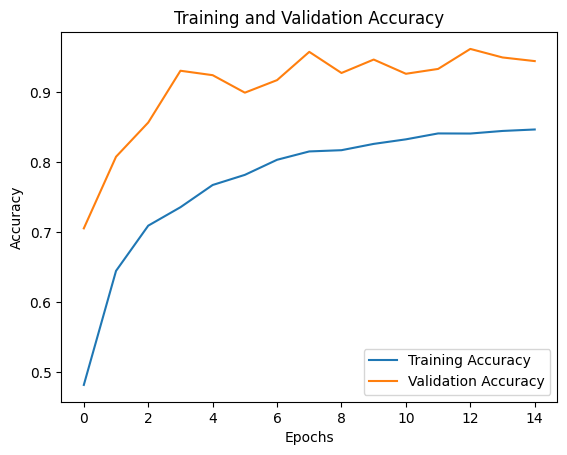

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.91      0.94      0.92      1032
           3       0.84      0.99      0.91      1010
           4       0.97      0.99      0.98       982
           5       0.93      0.86      0.89       892
           6       0.97      0.92      0.95       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.98      0.97       974
           9       0.98      0.92      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

[[ 954    0    5    4    2    4    7    2    1    1]
 [   0 1119    8    1    2    0    2    2    1    0]
 [   1    1  968   24    1   17   13    1    6    0]
 [   0    0    5  999    0

In [23]:
#Compile and fit the model for each optimizer
model.compile(optimizer=Adam(learning_rate=0.05, beta_1=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
                        steps_per_epoch=len(train_images) / 32,
                        validation_data=(val_images, val_labels),
                        epochs=15)
    
# Check for overfitting
pyplot.plot(history.history['loss'], label='Training Loss')
pyplot.plot(history.history['val_loss'], label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()
    
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
pyplot.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
pyplot.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
pyplot.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
pyplot.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
pyplot.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
pyplot.legend()

#Shows the plot on the screen.
pyplot.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
    
#Predict with the model
y_pred = model.predict(X_test)
    
# Convert predictions from one-hot encoding to label encoding
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
    
# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))
    
# Print the confusion matrix
print(confusion_matrix(y_true_labels, y_pred_labels))

Using Drop-out for Adam Optimizer as 0.8, learning_rate as 0.05, beta_1 of 0.9, epoch to 15, Batch Normalization, l2 regularizer of 0.01 with 4 convolution blocks, my model's performance further improved with an accuracy of 95% which is higher than the 93% previously gotten with Drop-out for Adam Optimizer as 0.7, learning_rate as 0.03, beta_1 of 0.9, epoch to 15, Batch Normalization, with 2 convolution blocks. 
An increase in Convolution block improved my model from 93% with 2 Convolution Blocks to 95% with 4 Convolution Blocks.

### What is the effect of varying learning rates on the performance of the CNN algorithm?

#### Increase Learning rate: 0.09

Epoch 1/15
1406/1406 [==============================] - 100s 70ms/step - loss: 4.4154 - accuracy: 0.8210 - val_loss: 5.4142 - val_accuracy: 0.9455
Epoch 2/15
1406/1406 [==============================] - 100s 71ms/step - loss: 4.0143 - accuracy: 0.8317 - val_loss: 490.6044 - val_accuracy: 0.9511
Epoch 3/15
1406/1406 [==============================] - 105s 74ms/step - loss: 4.3866 - accuracy: 0.8322 - val_loss: 1.0836 - val_accuracy: 0.9579
Epoch 4/15
1406/1406 [==============================] - 120s 85ms/step - loss: 4.2191 - accuracy: 0.8386 - val_loss: 1.2419 - val_accuracy: 0.9622
Epoch 5/15
1406/1406 [==============================] - 102s 73ms/step - loss: 4.5743 - accuracy: 0.8328 - val_loss: 1.6019 - val_accuracy: 0.9595
Epoch 6/15
1406/1406 [==============================] - 102s 72ms/step - loss: 4.0995 - accuracy: 0.8455 - val_loss: 1.1938 - val_accuracy: 0.9617
Epoch 7/15
1406/1406 [==============================] - 100s 71ms/step - loss: 4.5815 - accuracy: 0.8457 - val_loss:

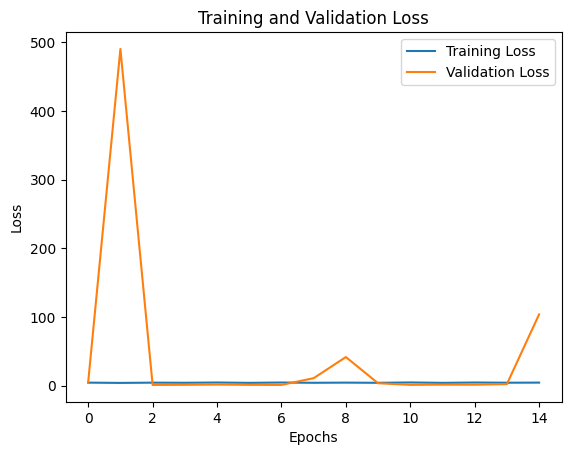

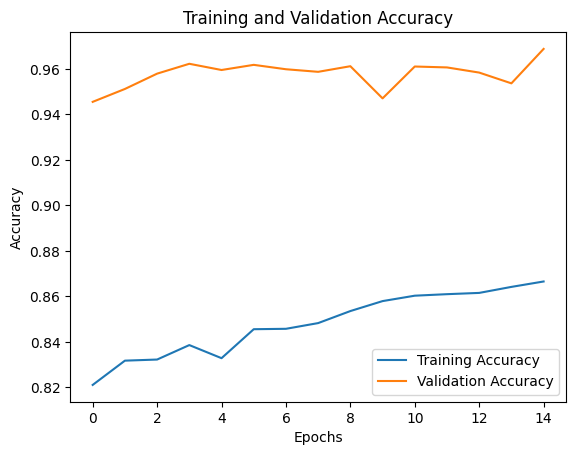

313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.95      0.96      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.96      0.96      0.96       892
           6       0.97      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.98      0.99       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 959    0    1    2    2    1   10    2    0    3]
 [   0 1126    5    0    2    1    0    1    0    0]
 [   0    1  984    1    5   11   19    7    2    2]
 [   0    0    5  977    1

In [24]:
#Compile and fit the model for each optimizer
model.compile(optimizer=Adam(learning_rate=0.09, beta_1=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
                        steps_per_epoch=len(train_images) / 32,
                        validation_data=(val_images, val_labels),
                        epochs=15)
    
# Check for overfitting
pyplot.plot(history.history['loss'], label='Training Loss')
pyplot.plot(history.history['val_loss'], label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()
    
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
pyplot.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
pyplot.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
pyplot.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
pyplot.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
pyplot.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
pyplot.legend()

#Shows the plot on the screen.
pyplot.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
    
#Predict with the model
y_pred = model.predict(X_test)
    
# Convert predictions from one-hot encoding to label encoding
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
    
# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))
    
# Print the confusion matrix
print(confusion_matrix(y_true_labels, y_pred_labels))

When the learning rate was increased from 0.05 to 0.09, the model achieved a higher accuracy of 98% compared to the previous iteration with an accuracy of 95%. A higher learning rate can sometimes lead to faster convergence, but it can also make the training process more sensitive and may result in overshooting the optimal weights. Overfitting is typically observed when the model performs well on the training data but does not generalize well to unseen data (validation or test set). An indicator of overfitting is when the validation loss becomes more significant than the training loss which is visible in the graph above